In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definizione dell'equazione di Van der Pol forzata
# def vanderpol(y, t, mu, A, omega):
#     x, v = y
#     dxdt = v
#     dvdt = mu * (1 - x**2) * v - x + A * np.cos(omega * t)
#     return [dxdt, dvdt]

def vanderpol(y, t, mu, A, omega):
    x, v = y
    dxdt = v
    dvdt = mu * (1 - x**2) * v - x + t * A * np.cos( 7 * t) # bello
    return [dxdt, dvdt]

# Parametri suggeriti per la coesistenza di attrattori
mu = 5.0
A = 0.5
omega = 7

# Tempo di simulazione (abbastanza lungo per superare il transitorio)
# t = np.linspace(0, 50, 5000)
# t = np.linspace(0, 100, 10000)
t = np.linspace(0, 200, 20000)
# t = np.linspace(0, 300, 30000)
# t = np.linspace(0, 400, 40000)


# Caso 1: Condizione iniziale "vicina al centro"
y0_1 = [0.1, 0.0]
sol1 = odeint(vanderpol, y0_1, t, args=(mu, A, omega))

# Caso 2: Condizione iniziale "lontana"
y0_2 = [4.0, 0.0]
sol2 = odeint(vanderpol, y0_2, t, args=(mu, A, omega))

# Caso 3: Una condizione iniziale intermedia
y0_3 = [0.1, -2.0]
sol3 = odeint(vanderpol, y0_3, t, args=(mu, A, omega))

# ============================
# Visualizzazione dei risultati
# ============================

plt.figure(figsize=(12, 10))

# --- 1) Grafico Temporale (regime stazionario) ---
plt.subplot(2, 2, 1)
plt.plot(t[-5000:], sol1[-5000:, 0], label='Partenza x=0.1', color='blue')
plt.plot(t[-5000:], sol2[-5000:, 0], label='Partenza x=4.0', color='red', alpha=0.8)
plt.plot(t[-5000:], sol3[-5000:, 0], label='Partenza x=2.0', color='green', alpha=0.8)
plt.title("Risposta Temporale dopo 150")
plt.xlabel("Tempo")
plt.ylabel("Posizione x")
plt.legend()

# --- 2) Ritratto di fase ---
plt.subplot(2, 2, 2)
plt.plot(sol1[-5000:, 0], sol1[-5000:, 1], color='blue', label='Attrattore A')
plt.plot(sol2[-5000:, 0], sol2[-5000:, 1], color='red', label='Attrattore B')
plt.plot(sol3[-5000:, 0], sol3[-5000:, 1], color='green', label='Attrattore C')
plt.title("Ritratto di fase")
plt.xlabel("x")
plt.ylabel("v")
plt.legend()

# --- 3) Evoluzione completa nel tempo ---
plt.subplot(2, 1, 2)
plt.plot(t, sol1[:, 0], color='blue', label='x(0)=0.1', alpha=0.8)
plt.plot(t, sol2[:, 0], color='red', label='x(0)=4.0', alpha=0.8)
plt.plot(t, sol3[:, 0], color='green', label='x(0)=0.1, -2', alpha=0.8)
plt.title("Evoluzione completa nel tempo")
plt.xlabel("Tempo")
plt.ylabel("Posizione x")
plt.legend()

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
# Conta quanti picchi ci sono negli ultimi 100 secondi
from scipy.signal import find_peaks

peaks1, _ = find_peaks(sol1[-10000:, 0])
peaks2, _ = find_peaks(sol2[-10000:, 0])

print(f"Numero di picchi Caso A: {len(peaks1)}")
print(f"Numero di picchi Caso B: {len(peaks2)}")

Numero di picchi Caso A: 8
Numero di picchi Caso B: 8


Calcolo in corso... potrebbe richiedere un minuto.


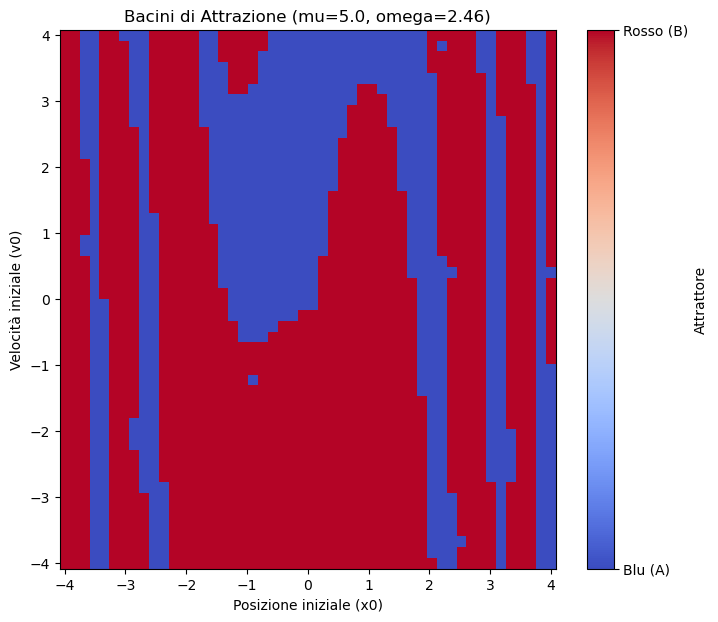

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def vanderpol(y, t, mu, A, omega):
    x, v = y
    return [v, mu * (1 - x**2) * v - x + A * np.cos(omega * t)]

# Parametri fissi
mu, A, omega = 5.0, 1.2, 2.46
t = np.linspace(0, 50, 500) # Simulazione breve per ogni punto

# Creazione della griglia di condizioni iniziali
x_range = np.linspace(-4, 4, 50)
v_range = np.linspace(-4, 4, 50)
X, V = np.meshgrid(x_range, v_range)

# Riferimento: eseguiamo una simulazione lunga per trovare la fase "Blu" a t=50
ref_sol = odeint(vanderpol, [0.1, 0.0], np.linspace(0, 50, 500), args=(mu, A, omega))
ref_final_x = ref_sol[-1, 0]

basin = np.zeros(X.shape)

print("Calcolo in corso... potrebbe richiedere un minuto.")
for i in range(len(x_range)):
    for j in range(len(v_range)):
        sol = odeint(vanderpol, [X[i,j], V[i,j]], t, args=(mu, A, omega))
        # Se la posizione finale è vicina a quella di riferimento, è Attrattore A
        if np.abs(sol[-1, 0] - ref_final_x) < 0.5:
            basin[i,j] = 1 # Blu
        else:
            basin[i,j] = 2 # Rosso

plt.figure(figsize=(8, 7))
plt.pcolormesh(X, V, basin, cmap='coolwarm', shading='auto')
plt.colorbar(ticks=[1, 2], label='Attrattore').set_ticklabels(['Blu (A)', 'Rosso (B)'])
plt.title(f"Bacini di Attrazione (mu={mu}, omega={omega})")
plt.xlabel("Posizione iniziale (x0)")
plt.ylabel("Velocità iniziale (v0)")
plt.show()

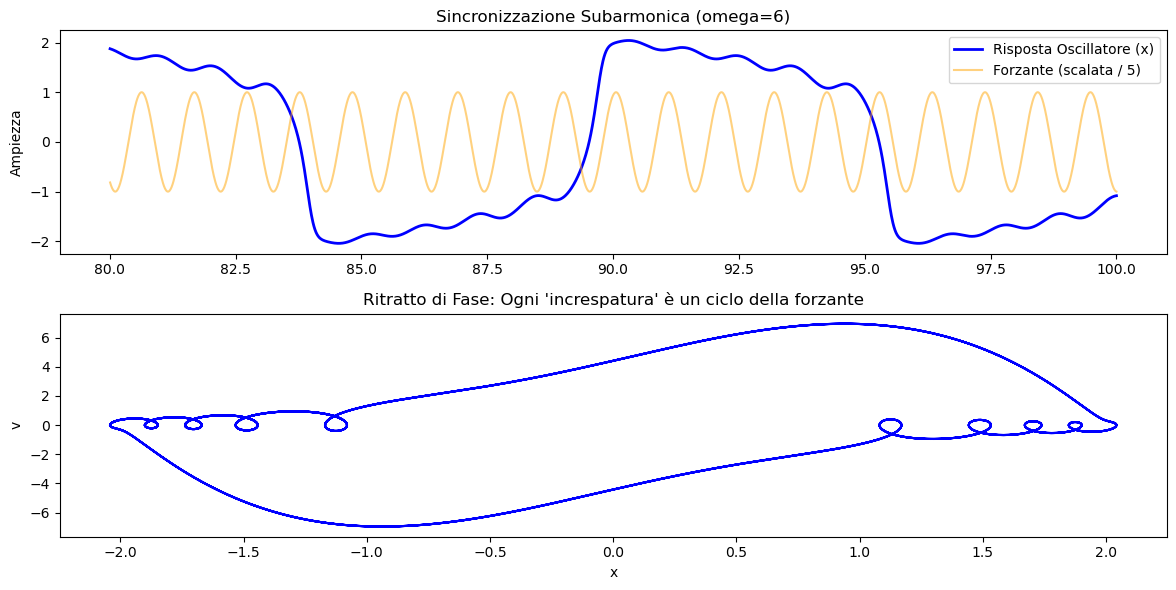

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def vanderpol_fixed(y, t, mu, A, omega):
    x, v = y
    return [v, mu * (1 - x**2) * v - x + A * np.cos(omega * t)]

# Parametri per evidenziare le subarmoniche
mu = 5
A = 5
omega = 6  # Forza esterna molto veloce

# t = np.linspace(0, 300, 30000)
t = np.linspace(0, 100, 10000)
sol = odeint(vanderpol_fixed, [0.1, 0.0], t, args=(mu, A, omega))

# Estraiamo l'ultimo tratto per l'analisi
t_zoom = t[-2000:]
x_zoom = sol[-2000:, 0]
forzante = A * np.cos(omega * t_zoom)

plt.figure(figsize=(12, 6))

# GRAFICO TEMPORALE: Confronto diretto
plt.subplot(2, 1, 1)
plt.plot(t_zoom, x_zoom, label='Risposta Oscillatore (x)', color='blue', lw=2)
plt.plot(t_zoom, forzante/5, label='Forzante (scalata / 5)', color='orange', alpha=0.5)
plt.title(f"Sincronizzazione Subarmonica (omega={omega})")
plt.ylabel("Ampiezza")
plt.legend()

# RITRATTO DI FASE: Contiamo le "gobbe"
plt.subplot(2, 1, 2)
plt.plot(sol[-5000:, 0], sol[-5000:, 1], color='blue')
plt.title("Ritratto di Fase: Ogni 'increspatura' è un ciclo della forzante")
plt.xlabel("x")
plt.ylabel("v")

plt.tight_layout()
plt.show()

In [2]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from D_CODE.run_simulation import run as run_SRT
from D_CODE.run_simulation_vi import run as run_DCODE
from toolbox.auxiliary_functions import set_param_freq

from data import equations
from data import SINDy_data

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


### Data Generations

In [3]:
# Select ODE & settings:
ode_name = 'TVVdpODE2' # help="name of the ode", type=str
ode_param = '5.0,0.5,3.14' # help="parameters of the ode (default: None)", type=str, default=None
freq = 20 # Dovrebbe essere 195 per avere dt = 5.130 * 10−3 come nel paper di riferimento
dt = 1 / freq
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.0 # help="noise level (default 0)", type=float, default=0.
dim_x = 3 # help="dimentionality of the problem", type=int
dim_k = 0 # help="dimentionality of the parameterizaiton discovery", type=int
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)
time_vector = np.arange(0, ode.T + dt, dt)

In [4]:
# generate data:
# X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
#                                                                    ode_param=ode_param,
#                                                                    freq=freq,
#                                                                    n_sample=n_sample,
#                                                                    noise_ratio=noise_ratio,
#                                                                    dim_x=dim_x,
#                                                                    dim_k=dim_k)
# X_list = SINDy_data.existence_conditions(X_list, ode.init_low, n_variables=dim_x)

# save data:
file_path = 'Online-Test/saved/data/TVVdpODE2_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

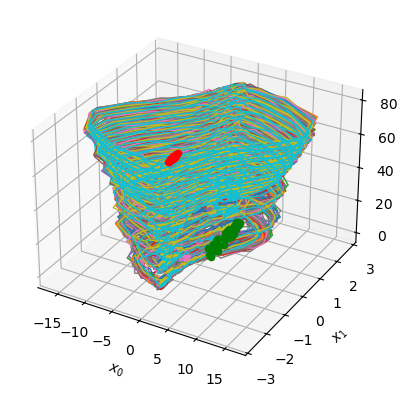

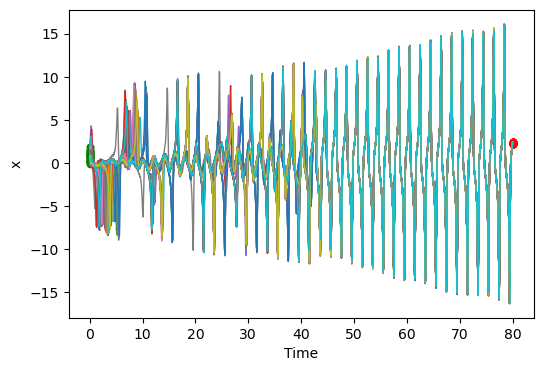

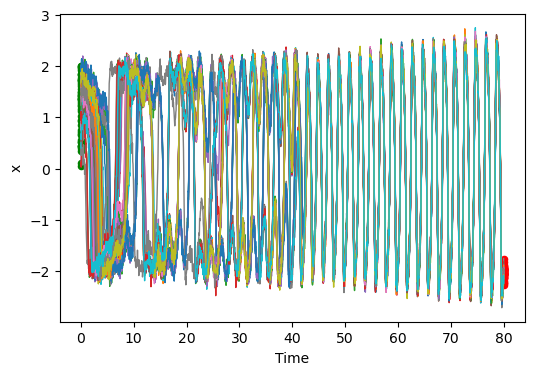

In [19]:
SINDy_data.plot_configuration(np.array(X_list)[:,:,:])
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:1], ode.T)
SINDy_data.plot_configuration(np.array(X_list)[:,:,1:2], ode.T)

#### Check SINDy 

In [ ]:
X_lista = [np.array(x)[:300, :] for x in X_list]
dX_lista = [np.array(dx)[:300, :] for dx in dX_list]

model = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=3, include_bias=True), optimizer=ps.STLSQ(threshold=0.4))
model.fit(X_lista, t=dt, multiple_trajectories=True, x_dot=dX_lista)
print("Estimated SINDy model: ")
model.print()

Estimated SINDy model: 
(X0)' = 4.721 X0 + -4.705 X0 X1^2
(X1)' = 1.006 X0
(X2)' = 1.004 1


In [14]:
X_lista = [np.array(x)[340:640, :] for x in X_list]
dX_lista = [np.array(dx)[340:640, :] for dx in dX_list]

# lambda function:
building_blocks_lambda = lambda X0, X1, X2: np.cos(3.1457877954899454*X2)
function_names = lambda X0, X1, X2: "cos( 3.146 "+ X2 + " )"

# building the library:
from toolbox.auxiliary_functions import intercept_library_fun
intercept_library = intercept_library_fun(dim_x+dim_k)
polynomial_library = ps.PolynomialLibrary(degree=3, include_bias=False)
custom_library = ps.CustomLibrary(library_functions=[building_blocks_lambda], function_names=[function_names]) # custom library with building block
generalized_library = ps.GeneralizedLibrary(libraries=[polynomial_library, custom_library], tensor_array=[[1,1]])
final_library = ps.ConcatLibrary([intercept_library, generalized_library]) # add the intercept


model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.30))
model.fit(X_lista, t=dt, multiple_trajectories=True, x_dot=dX_lista)
print("Estimated SINDy model: ")
model.print()
print(np.sum(np.abs(model.coefficients())))

Estimated SINDy model: 
(X0)' = 5.151 X0 + -1.499 X1 + -4.533 X0 X1^2 + 0.356 cos( 3.146 X2 ) + 0.409 X2 cos( 3.146 X2 ) + 0.806 X0 X1 cos( 3.146 X2 )
(X1)' = 1.006 X0
(X2)' = 0.995 1
14.75592425114499


In [21]:
# lambda function:
building_blocks_lambda = lambda X0, X1, X2: np.cos(3.1457877954899454*X2)
function_names = lambda X0, X1, X2: "cos( 3.146 "+ X2 + " )"

# building the library:
from toolbox.auxiliary_functions import intercept_library_fun
intercept_library = intercept_library_fun(dim_x+dim_k)
polynomial_library = ps.PolynomialLibrary(degree=3, include_bias=False)
custom_library = ps.CustomLibrary(library_functions=[building_blocks_lambda], function_names=[function_names]) # custom library with building block
generalized_library = ps.GeneralizedLibrary(libraries=[polynomial_library, custom_library], tensor_array=[[1,1]])
final_library = ps.ConcatLibrary([intercept_library, generalized_library]) # add the intercept

for T in np.arange(48,55,1):
    T0 = T - 40
    freqint = 20
    X_lista = [np.array(x)[T0*freqint:T*freqint, :] for x in X_list]
    dX_lista = [np.array(dx)[T0*freqint:T*freqint, :] for dx in dX_list]

    print("Intervallo: [", T0, ",", T, "]")
    model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.30))
    model.fit(X_lista, t=dt, multiple_trajectories=True, x_dot=dX_lista)
    print("Estimated SINDy model: ")
    model.print()
    print("Complexity: ", np.sum(np.abs(model.coefficients())))
    print()



Intervallo: [ 8 , 48 ]
Estimated SINDy model: 
(X0)' = 5.454 X0 + -1.696 X1 + -4.639 X0 X1^2 + 0.431 X2 cos( 3.146 X2 ) + 0.770 X0 X1 cos( 3.146 X2 )
(X1)' = 1.006 X0
(X2)' = 0.999 1
Complexity:  14.995188064118253

Intervallo: [ 9 , 49 ]
Estimated SINDy model: 
(X0)' = 5.490 X0 + -1.744 X1 + -4.639 X0 X1^2 + 0.430 X2 cos( 3.146 X2 ) + 0.778 X0 X1 cos( 3.146 X2 )
(X1)' = 1.006 X0
(X2)' = 1.001 1
Complexity:  15.086202462705584

Intervallo: [ 10 , 50 ]
Estimated SINDy model: 
(X0)' = 5.508 X0 + -1.813 X1 + -4.629 X0 X1^2 + -0.371 cos( 3.146 X2 ) + 0.439 X2 cos( 3.146 X2 ) + 0.806 X0 X1 cos( 3.146 X2 )
(X1)' = 1.006 X0
(X2)' = 1.003 1
Complexity:  15.574428657145729

Intervallo: [ 11 , 51 ]
Estimated SINDy model: 
(X0)' = 5.368 X0 + -2.682 X1 + -4.505 X0 X1^2 + 12.273 cos( 3.146 X2 ) + 0.990 X0 X1 cos( 3.146 X2 )
(X1)' = 1.005 X0
(X2)' = 0.997 1
Complexity:  27.820190325827774

Intervallo: [ 12 , 52 ]
Estimated SINDy model: 
(X0)' = 5.397 X0 + -2.775 X1 + -4.518 X0 X1^2 + 12.565 cos( 3.1

#### Check SR

In [1]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from D_CODE.run_simulation import run as run_SRT
from D_CODE.run_simulation_vi import run as run_DCODE
from toolbox.auxiliary_functions import set_param_freq

from data import equations
from data import SINDy_data

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [2]:
# Select ODE & settings:
ode_name = 'TVVdpODE2' # help="name of the ode", type=str
ode_param = '5.0,0.5,3.14' # help="parameters of the ode (default: None)", type=str, default=None
freq = 20 
dt = 1 / freq
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
dim_x = 3 # help="dimentionality of the problem", type=int
dim_k = 0 # help="dimentionality of the parameterizaiton discovery", type=int
# ode_param, freq = set_param_freq(ode_param, freq)
# ode = equations.get_ode(ode_name, ode_param)
# time_vector = np.arange(0, ode.T + dt, dt)

In [3]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq

run_SRT(ode_name, param, 0, freq, n_sample, noise_ratio, 'tv', seed=100, n_seed=1, T0=20, T=30)
# con rumore = 0 -> 4.008
# con rumore = 0.01 -> 4.135 con lambda = 0.02
None

Running with: ode_name=TVVdpODE2, ode_param=5.0,0.5,3.14, x_id=0, freq=20, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 2, 'add': 1, 'sub': 1, 'cos': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.05      8.51201e+11        2          5.39017          6.08989      4.73m
 
promising programs:
sub(mul(cos(X1), X0), X1)
add(neg(X1), add(neg(cos(X0)), mul(cos(X1), X0)))
add(neg(X1), add(neg(cos(X0)), mul(cos(X1), X0)))
neg(X1)
neg(X1)
neg(X1)
neg(X1)
neg(X1)
neg(X1)
neg(X1)
neg(X1)
neg(X1)
neg(X1)
neg(X1)
neg(X1)
 
   1     4.33          435.055       11          5.22935          5.54644      3.70m
 
promising programs:
sub(mul(cos(X1), X0), X1)
sub(mul(cos(X1), X0), X1)
sub(mul(cos(X1), X0), X1)
sub(mul(

Running with: ode_name=TVVdpODE2, ode_param=5.0,0.5,4.0, x_id=0, freq=20, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
Data generated
Dataset shape before smoothing:  (201, 50, 3)


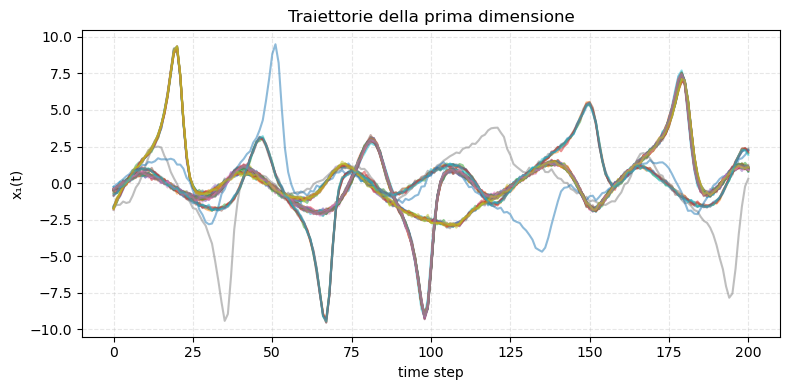

Dataset shape:  (201, 50, 3)


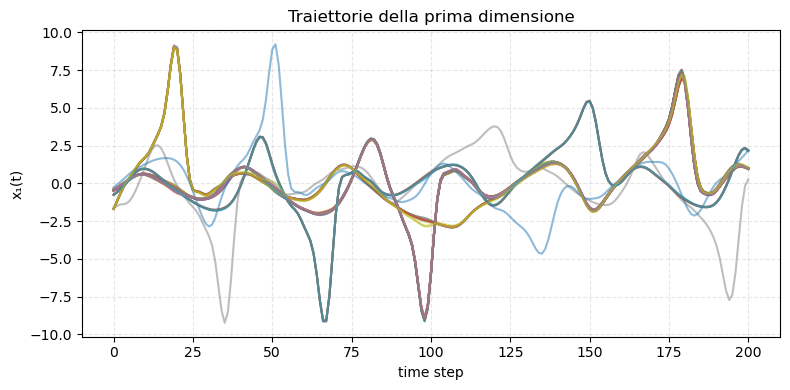

Functions set:  {'neg': 1, 'mul': 2, 'add': 1, 'sub': 1, 'cos': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.05      4.62277e+30        6          7896.96          7889.74      3.41m
   1     3.86      2.85177e+11       11          6965.81          7168.99      2.71m
   2     3.56      9.34475e+14       10          5156.58          5270.94      2.56m
 
promising programs:
mul(mul(X0, X1), mul(cos(add(X1, X1)), X0))
mul(mul(X0, X1), mul(cos(add(X1, X1)), X0))
mul(mul(X0, X1), mul(cos(add(X1, X1)), X0))
mul(mul(X1, mul(cos(add(X1, X1)), X0)), X0)
mul(mul(cos(add(X1, X1)), X0), mul(X1, X0))
mul(mul(X1, X0), mul(cos(add(X1, X1)), X0))
mul(mul(X0, X1), mul(cos(add(X1, X1)), X0))
mul(mul(X1, X0), mul(cos(add(X1, X1)), X0))
mul(mul(X0, X1), mul(cos(add(X1, X1)), X0))
mul(mul(X0, X

In [3]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq

run_DCODE(ode_name, param, 0, freq, n_sample, noise_ratio=0.01, seed=100, n_seed=1, T0=20, T=30)
# D-CODE penalty = 0.4 -> 4.036
None

#### Computation std

In [ ]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
                                                                   ode_param=ode_param,
                                                                   freq=freq,
                                                                   n_sample=200,
                                                                   noise_ratio=0.0,
                                                                   dim_x=dim_x,
                                                                   dim_k=dim_k)

X = np.array(dX_list)[:,:,:]
print('Shape: ',X.shape)

vec_rmse = []
for i in range(X.shape[0]):
    rmse = root_mean_squared_error(X[i], np.zeros(X[i].shape))
    print('RMSE: ', rmse)
    vec_rmse.append(rmse)

vec_rmse = np.array(vec_rmse)
print('RMSE Mean: ', vec_rmse.mean())

Shape:  (200, 1600, 3)
RMSE:  9.169965362353986
RMSE:  9.214835410309387
RMSE:  9.191881202129299
RMSE:  9.191818796796625
RMSE:  9.166736369285806
RMSE:  9.228076300673864
RMSE:  9.196958312466508
RMSE:  9.168821235666648
RMSE:  9.1698649225666
RMSE:  9.221777268911096
RMSE:  9.227146272913581
RMSE:  9.18734247769843
RMSE:  9.195676531821816
RMSE:  9.189868223645847
RMSE:  9.189788368684212
RMSE:  9.159010853874564
RMSE:  9.213622172740642
RMSE:  9.16683552336889
RMSE:  9.22874495741305
RMSE:  9.216771564085798
RMSE:  9.170791255473748
RMSE:  9.187222422560376
RMSE:  9.168537470001672
RMSE:  9.219795938733531
RMSE:  9.230574475085971
RMSE:  9.179673991823798
RMSE:  9.198852316849457
RMSE:  9.138159824623909
RMSE:  9.189049409236093
RMSE:  9.203951714350568
RMSE:  9.200768388691595
RMSE:  9.1906766664155
RMSE:  9.23016622565534
RMSE:  9.184430763749816
RMSE:  9.17253475093
RMSE:  9.185439925450487
RMSE:  9.17153619888065
RMSE:  9.165444326325128
RMSE:  9.197670148242452
RMSE:  9.191128